# NEST Simulator tutorial:  Simulating a single neuron

In this tutorial we will create the most basic case of simulation including only one neuron. This neuron will be fed by internal input current and random activity following a simple poissonian generator. Finally, the activity of the neuron will be meassured using a multimeter and a spiking detector

First, we initialize the libraries tha will be used during the exercise:
- Nest simulator: We import the PyNest library to create the network and indicate the CPU the configuration of our model.
- Numpy: This is a popular widely used library to work with numeric data and perform basic mathematical operations.
- Matplotlyb: This library allow us to graphically display the resaults of our simulations.

In [1]:
import nest
import numpy as np
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@41892a50f
 Built: Mar  8 2023 07:54:18

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Once NEST is loaded we can start creating the script of the configuration of our network. First, we create our neuron and give it a name, for example we will call it "single_neuron" using the nest's command **Create**.
Here, for simplicity we will use an **integrate and fire model**. 
<br><br>However, Nest Simulator contains several models that can be consultated in its help-index website. The second parameter provided to the Create function is the **number of elements**, in our exrcise will be just one (1) single neuron.

In [2]:
single_neuron = nest.Create('iaf_psc_alpha', 1)

Now, we can see all the information contained inside the neuron by runing (inspecting) the python's variable (precisely an object) called "single_neuron". For example we can now the membrane potential (V_m) of the neuron in this precise moment by using *neuron.V_m*
<br><br> Otherwise, if we want to get all the data of the neuron model at this moment to check not only the current status but also the parameters of this particular model, we can use the function *neuron.get()*

In [3]:
single_neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 17,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

However, to record the membrane potential of the neuron during all the simulation, the multimeter recorder can facilitate us this. Here, we add an multimeter and connect our model called "singleneuron" to the device called "vm_multimeter" and set it to record the membrane potential (V_m). Importantly, we must connect the device to the neuron model and not in the opposite case.

In [4]:
vm_multimeter = nest.Create('multimeter', 1)
vm_multimeter.set(record_from=['V_m'])
nest.Connect(vm_multimeter, single_neuron)

In addition, we can also record the spike activity of the neuron using a detector. This device stores the spikes produced by the neuron saving when the event takes place. Importantly, here the connection is from neuron to spike recorder in contrast with the multimeter case.

In [5]:
spike_recorder = nest.Create("spike_recorder")
nest.Connect(single_neuron, spike_recorder)

Now, we are prepared to inject an input to our neuron model. There are several clases of inputs, although for this initial example we will use a basic constant input current arriving to the neuron from the background activity. This simple case can be added to the neuron by setting one of its parameters **"I_e"** indicating how much input current (pA) comes to the neuron. For this initial example, we will use a value of *376.0 pA*. We can modify this parameter of our "single_neuron" directly using the following command:

In [6]:
single_neuron.I_e = 376.0

Finally, once we have the devices to record the activity and the neuron model has input, we can proceed with the simulation by using **"nest.Simulate()"**. By default, the number indicated means miliseconds, although the time resolution can be changed in the nest kernel at the begining of the script.
<br> Here we will simulate 2 seconds, corresponding to 2000 miliseconds in each one the membrane potential (V_m) and spikes will be recorded.

In [7]:
nest.Simulate(2000.0)


Jul 09 12:09:45 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Jul 09 12:09:45 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 09 12:09:45 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 09 12:09:45 SimulationManager::run [Info]: 
    Simulation finished.


In order to inspect the activity of the *multimeter* (called as vm_multimeter in our case), we get the data contained inside the "events" structure. Later we use the matplotlib library to plot the membrane potential data of the neuron during the time of the simulation.

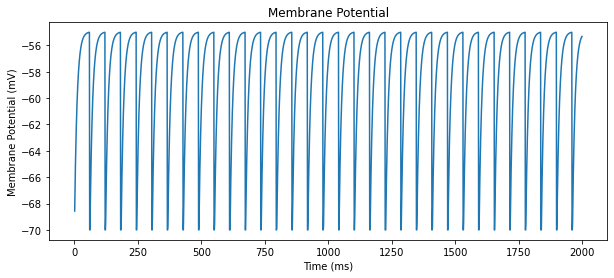

In [8]:
# Retrieving and plotting the membrane potential
membrane_potential = nest.GetStatus(vm_multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential['times'], membrane_potential['V_m'])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential")
plt.show()

Alternatively, we can inspect when the neuron fires (spike) using the information stored in the detector device "spike_recorder". To access to its information, instead of using nest.GetStatus() as done before, we can also directly us the command *device.get("variable")*.

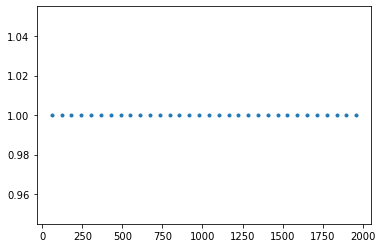

In [9]:
events = spike_recorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

## Exercise #1

Now re-run the code using the following different background current activity during 5 seconds: 
1. 370.0 pA
2. 390.0 pA
<br><br>What is the firing rate (spikes per second, spk/s) does each input produce in the neuron?


Jul 09 12:09:45 NodeManager::prepare_nodes [Info]: 
    Preparing 6 nodes for simulation.

Jul 09 12:09:45 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 6
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 09 12:09:45 SimulationManager::run [Info]: 
    Simulation finished.


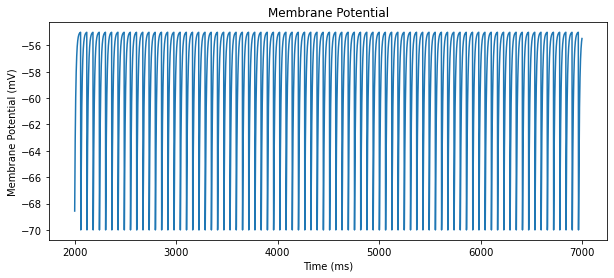

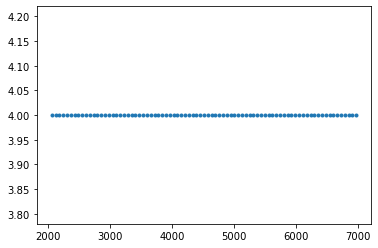

The firing rate of the neuron is 16.2 spks/s.


In [10]:
import nest
import numpy as np
import matplotlib.pyplot as plt

sim_time = 5000

# Create neuron
single_neuron = nest.Create('iaf_psc_alpha', 1)

# Create recorders
vm_multimeter = nest.Create('multimeter', 1)
vm_multimeter.set(record_from=['V_m'])
nest.Connect(vm_multimeter, single_neuron)

spike_recorder = nest.Create("spike_recorder")
nest.Connect(single_neuron, spike_recorder)

# Set input
single_neuron.I_e = 376.0

# Simulate
nest.Simulate(sim_time)

# Plot results
membrane_potential = nest.GetStatus(vm_multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential['times'], membrane_potential['V_m'])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential")
plt.show()

events = spike_recorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

# Finally calculate spks/s
spks_s = (len(ts)/sim_time)*1000
print("The firing rate of the neuron is", spks_s, "spks/s.")

### Input device

We can also use devices to produce an artificial and more bio-realistic input current to the neuron. One of the most common devices is the poissonian noise generator. To adapt this devices we follow a similar proceeding as previously employed with the recorder devices: First we create the device and then we connect it to the neuron (By default, the connection has a weight of 1 pA):
<br><br>noise = nest.Create('poisson_generator', 1)<br>noise.rate = 0.0<br>nest.Connect(noise,neuron, syn_spec={"weight": 1.0})

## Exercise #2

Create a similiar simulation using 5 neurons using different input levels and types of injection and plot them to visualize the difference between the input methods:
1. A constant input current of 380 pA.
2. A poissonian noise with a firing rate of 67000 spks/s.
3. Two poissonian noises, one excitatory (70000 spks/s, weight 1.2 pA) and another inhibitory (15000 spks, weight -1 pA).

What is the firing rate of the neuron for each input method?


Jul 09 12:09:46 NodeManager::prepare_nodes [Info]: 
    Preparing 9 nodes for simulation.

Jul 09 12:09:46 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 9
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 09 12:09:46 SimulationManager::run [Info]: 
    Simulation finished.


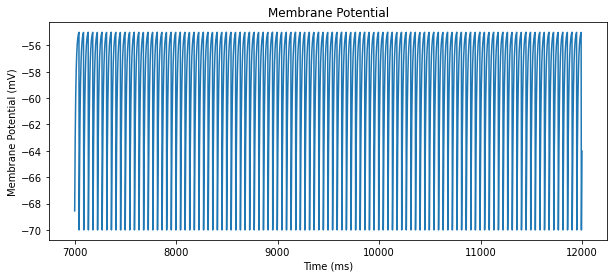

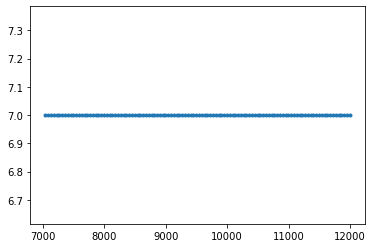

The firing rate of the neuron is 22.0 spks/s.


In [11]:
import nest
import numpy as np
import matplotlib.pyplot as plt

sim_time = 5000

# Create neuron
single_neuron = nest.Create('iaf_psc_alpha', 1)

# Create recorders
vm_multimeter = nest.Create('multimeter', 1)
vm_multimeter.set(record_from=['V_m'])
nest.Connect(vm_multimeter, single_neuron)

spike_recorder = nest.Create("spike_recorder")
nest.Connect(single_neuron, spike_recorder)

# Set input
single_neuron.I_e = 380.0

# Simulate
nest.Simulate(sim_time)

# Plot results
membrane_potential = nest.GetStatus(vm_multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential['times'], membrane_potential['V_m'])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential")
plt.show()

events = spike_recorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

# Finally calculate spks/s
spks_s = (len(ts)/sim_time)*1000
print("The firing rate of the neuron is", spks_s, "spks/s.")


Jul 09 12:09:46 NodeManager::prepare_nodes [Info]: 
    Preparing 13 nodes for simulation.

Jul 09 12:09:46 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 13
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 09 12:09:46 SimulationManager::run [Info]: 
    Simulation finished.


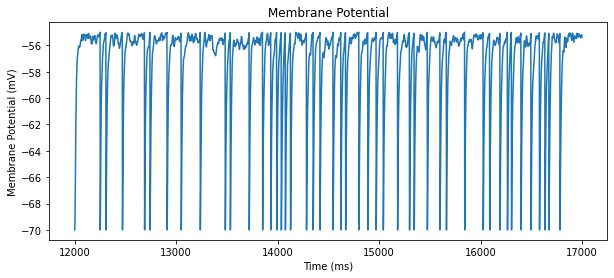

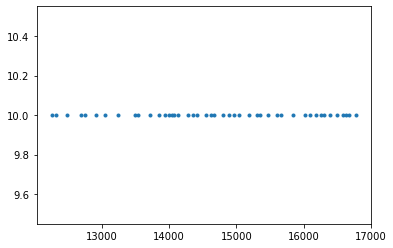

The firing rate of the neuron is 9.0 spks/s.


In [12]:
import nest
import numpy as np
import matplotlib.pyplot as plt

sim_time = 5000

# Create neuron
single_neuron = nest.Create('iaf_psc_alpha', 1)

# Create recorders
vm_multimeter = nest.Create('multimeter', 1)
vm_multimeter.set(record_from=['V_m'])
nest.Connect(vm_multimeter, single_neuron)

spike_recorder = nest.Create("spike_recorder")
nest.Connect(single_neuron, spike_recorder)

# Set input
single_neuron.I_e = 0.0
noise = nest.Create('poisson_generator', 1)
noise.rate = 67000.0
nest.Connect(noise,single_neuron, syn_spec={"weight": 1.0})

# Simulate
nest.Simulate(sim_time)

# Plot results
membrane_potential = nest.GetStatus(vm_multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential['times'], membrane_potential['V_m'])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential")
plt.show()

events = spike_recorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

# Finally calculate spks/s
spks_s = (len(ts)/sim_time)*1000
print("The firing rate of the neuron is", spks_s, "spks/s.")


Jul 09 12:09:47 NodeManager::prepare_nodes [Info]: 
    Preparing 18 nodes for simulation.

Jul 09 12:09:47 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 18
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 09 12:09:47 SimulationManager::run [Info]: 
    Simulation finished.


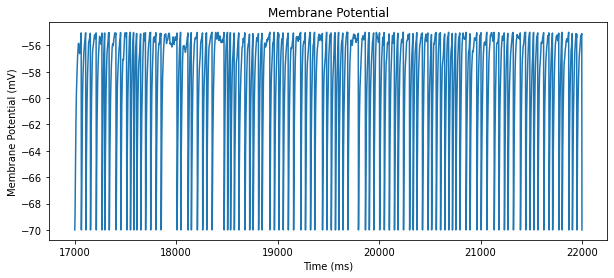

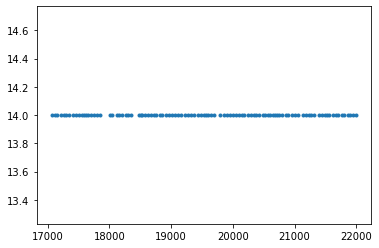

The firing rate of the neuron is 20.0 spks/s.


In [13]:
import nest
import numpy as np
import matplotlib.pyplot as plt

sim_time = 5000

# Create neuron
single_neuron = nest.Create('iaf_psc_alpha', 1)

# Create recorders
vm_multimeter = nest.Create('multimeter', 1)
vm_multimeter.set(record_from=['V_m'])
nest.Connect(vm_multimeter, single_neuron)

spike_recorder = nest.Create("spike_recorder")
nest.Connect(single_neuron, spike_recorder)

# Set input
single_neuron.I_e = 0.0
noise_exc = nest.Create('poisson_generator', 1)
noise_exc.rate = 70000.0
nest.Connect(noise_exc,single_neuron, syn_spec={"weight": 1.2})
noise_inh = nest.Create('poisson_generator', 1)
noise_inh.rate = 15000.0
nest.Connect(noise_inh,single_neuron, syn_spec={"weight": -1.0})

# Simulate
nest.Simulate(sim_time)

# Plot results
membrane_potential = nest.GetStatus(vm_multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential['times'], membrane_potential['V_m'])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential")
plt.show()

events = spike_recorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

# Finally calculate spks/s
spks_s = (len(ts)/sim_time)*1000
print("The firing rate of the neuron is", spks_s, "spks/s.")